# Описалово

# 0. Подготовительные шаги и функции  
Загружаю библиотеки и объявляю константы

In [100]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
import math
DF_NAMES = ['df_cow', 'df_main', 'df_dad']

COW_CAT_COL = {'breed':'Порода', 'pasture_type':'Тип пастбища', 'breed_dad':'Порода отца', 'dad_name':'Кличка отца', 'age':'Возраст'}
MAIN_CAT_COL = {'breed':'Порода', 'pasture_type':'Тип пастбища', 'breed_dad':'Порода отца', 'taste':'Вкус', 'age':'Возраст'}
DAD_CAT_COL = {'name':'Кличка'}

COW_NUM_COL = {'fat_per':'Процент жирности', 'protein_per':'Проценты белка'}
MAIN_NUM_COL = {'yield':'Удой', 'eke':'Энергетическая кормовая единица', 'protein_weight':'Содержание сырого протеина в корме (г.)', 'spo':'Сахаро-протеиновое соотношение', 'fat_per':'Процент жирности', 'protein_per':'Процент белка'}

# 1. Предобработка данных

## Преамбула  
### Для выполнения задачи заказчиком были переданы три набора данных  
 - ferma_main.csv - содержит данные о стаде на данный момент;  
 - ferma_dad.csv - содержит клички быков родителей каждой коровы в стаде фермера;  
 - cow_buy.csv - данне о коровах "ЭкоФермы" предложенных к покупке заказчиком;  
 В ходе дальнейших действий я произведу манипуляции с данными подготавливая их для дальнейших операций.

#### Загружаю данные из файлов в датафреймы. Т.к. работу выполнял локально добавил проверку.

In [54]:
try:
    df_cow=pd.read_csv('c:/ps/project/happy_farm/data/cow_buy.csv', sep=';', decimal=",")
    df_main=pd.read_csv('c:/ps/project/happy_farm/data/ferma_main.csv', sep=';', decimal=",")
    df_dad=pd.read_csv('c:/ps/project/happy_farm/data/ferma_dad.csv', sep=';', decimal=",")
except:
    df_cow=pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=",")
    df_main=pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=",")
    df_dad=pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=",")

В файлах использовался не стандартный разделитель, пришлось добавить разделитель. Указал разделитель для дробных данных, чтобы иметь возможность их корректно обрабатывать.

#### Проанализирую содержимое таблиц и тип хранимых данных.

##### Выведу пять случайных строк каждой таблицы, чтобы посмотреть на их содержимое.

In [55]:
display(df_cow.sample(5))
display(df_main.sample(5))
display(df_dad.sample(5))

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
620,621,6813,14.5,1712,0.96,РефлешнСоверинг,Равнинное,Айдиал,3.72,3.075,вкусно,более_2_лет
397,398,5207,13.3,1829,0.89,РефлешнСоверинг,Холмистое,Соверин,3.48,3.077,не вкусно,менее_2_лет
95,96,6976,16.4,2263,0.95,Вис Бик Айдиал,Холмистое,Айдиалл,3.71,3.078,вкусно,более_2_лет
316,317,6515,15.2,2221,0.93,Вис Бик Айдиал,Холмистое,Соверин,3.72,3.077,не вкусно,более_2_лет
401,402,5814,14.6,1794,0.89,Вис Бик Айдиал,Холмистое,Соверин,3.59,3.077,вкусно,более_2_лет


,id,Имя Папы
476,477,Барин
546,547,Барин
76,77,Геркулес
459,460,Соловчик
176,177,Геркулес


##### Посмотрю соответствие типов столбцов описанным в задаче типам.

In [56]:
display(df_cow.info(True))
display(df_main.info(True))
display(df_dad.info(True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

Можно заметить, что пропусков в столбцах нет.  
Формат столбцов не соответствует хранимым в них данным. Именование столбцов тоже мне не подходят. Изменю тип даннх столбцов немного позже - после переименования столбцов.

#### Проверю именование столбцов

In [57]:
display('COW - table')
display(df_cow.columns.tolist())
display('MAIN - table')
display(df_main.columns.tolist())
display('DAD - table')
display(df_dad.columns.tolist())

'COW - table'

['Порода',
 'Тип пастбища',
 'порода папы_быка',
 'Имя_папы',
 'Текущая_жирность,%',
 'Текущий_уровень_белок,%',
 'Возраст']

'MAIN - table'

['id',
 'Удой, кг',
 'ЭКЕ (Энергетическая кормовая единица)',
 'Сырой протеин, г',
 'СПО (Сахаро-протеиновое соотношение)',
 'Порода',
 'Тип пастбища',
 'порода папы_быка',
 'Жирность,%',
 'Белок,%',
 'Вкус молока',
 'Возраст']

'DAD - table'

['id', 'Имя Папы']

Именование столбцов не соттветсвует требованиям. Переименовываю.

In [58]:
df_cow.columns = ['breed',
                  'pasture_type',
                  'breed_dad',
                  'dad_name',
                  'fat_per',
                  'protein_per',
                  'age']
df_main.columns = ['id',
                   'yield',
                   'eke',
                   'protein_weight',
                   'spo',
                   'breed',
                   'pasture_type',
                   'breed_dad',
                   'fat_per',
                   'protein_per',
                   'taste',
                   'age']
df_dad.columns = ['id', 
                  'name']



#### Меняю тип данных столбцов в соответствии с таблицей:  

**df_cow**
| Имя столбца    | Тип данных  | Новый тип данных |
|:---------------|:-----------:|:----------------:|
| breed          | object      | object           |
| pasture_type   | object      | object           |
| breed_dad      | object      | object           |
| dad_name       | object      | object           |
| fat_per        | object      | float64          |
| protein_per    | object      | float64          |
| age            | object      | object           |  

**df_main**
| Имя столбца    | Тип данных  | Новый тип данных |
|:---------------|:-----------:|:----------------:|
| id             | int64       | int64            |
| yield          | int64       | int64            |
| eke            | object      | float64          |
| protein_weight | int64       | int64            |
| spo            | object      | float64          |
| breed          | object      | object           |
| pasture_type   | object      | object           |
| breed_dad      | object      | object           |
| fat_per        | object      | float64          |
| protein_per    | object      | float64          |
| taste          | object      | object           |
| age            | object      | object           |  

**df_dad**
| Имя столбца    | Тип данных  | Новый тип данных |
|:---------------|:-----------:|:----------------:|
| id             | object      | int64            |
| name           | object      | object           |

In [59]:
df_cow = df_cow.astype({
    'fat_per': float,
    'protein_per': float
    
})

df_main = df_main.astype({
    'eke': float,
    'spo': float,
    'fat_per': float,
    'protein_per': float
})

df_dad = df_dad.astype({
    'id': float    
})

#### Проверю таблицы на дубликаты

##### Выведу список явных дубликатов

In [77]:
for d in DF_NAMES:
    print(f'В {d} найдено дубликатов: {globals()[d].duplicated().sum()}')

В df_cow найдено дубликатов: 0
В df_main найдено дубликатов: 0
В df_dad найдено дубликатов: 0


###### Удаляю явные дубликаты

In [78]:
for d in DF_NAMES:
    globals()[d] = globals()[d].drop_duplicates()

##### Проверю на наличие неявных дубликатов у нечисловых столбцов

In [116]:
for d in DF_NAMES:
    if 'cow' in d: c_a = COW_CAT_COL.keys()
    if 'main' in d: c_a = MAIN_CAT_COL.keys()
    if 'dad' in d: c_a = DAD_CAT_COL.keys()
    for c in c_a:    
        print(f'Список уникальных значений таблицы {d} столбца {c}: {globals()[d][c].unique()}')

Список уникальных значений таблицы df_cow столбца breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Список уникальных значений таблицы df_cow столбца pasture_type: ['холмистое' 'равнинное']
Список уникальных значений таблицы df_cow столбца breed_dad: ['Айдиал' 'Соверин']
Список уникальных значений таблицы df_cow столбца dad_name: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Список уникальных значений таблицы df_cow столбца age: ['более_2_лет' 'менее_2_лет']
Список уникальных значений таблицы df_main столбца breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Список уникальных значений таблицы df_main столбца pasture_type: ['Равнинное' 'Холмистое']
Список уникальных значений таблицы df_main столбца breed_dad: ['Айдиал' 'Соверин' 'Айдиалл']
Список уникальных значений таблицы df_main столбца taste: ['вкусно' 'не вкусно']
Список уникальных значений таблицы df_main столбца age: ['более_2_лет' 'менее_2_лет']
Список уникальных значений таблицы df_dad столбца name: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Наблюдаю задвоенные значения:  
_Список уникальных значений тамблицы df_main столбца pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']_   

Заменю **Равнинные** на **Равнинное**

In [115]:
df_main.loc[df_main['pasture_type'] == 'Равнинные', 'pasture_type'] = 'Равнинное'

## Вывод:  
Из полученных файлов от заказчика данные были загружены в три таблицы. Именование столбцов не соответствовало требованиям для проведения дальнейших работ - исправлено. Тип данных в столбцах не соответствовал хранимым в них данным - исправлено. Явных дубликатов было единичное количество и они удалены. Дубликаты вызванные человеческим фактором исправлены.

# 2. Исследовательский анализ данных

## Преамбула

### Выведу описательную статистику по каждой таблице

In [101]:
print(f'Таблица DF_COW')
print(df_cow.describe())
print(f'Таблица DF_MAIN')
print(df_main.describe())


Таблица DF_COW
         fat_per  protein_per
count  16.000000    16.000000
mean    3.571875     3.068250
std     0.141620     0.011264
min     3.340000     3.046000
25%     3.415000     3.059500
50%     3.585000     3.073500
75%     3.692500     3.076750
max     3.770000     3.081000
Таблица DF_MAIN
               id        yield         eke  protein_weight         spo  \
count  628.000000   628.000000  628.000000      628.000000  628.000000   
mean   315.474522  6125.968153   14.548726     1923.759554    0.913089   
std    181.475367   475.857053    1.301777      182.832816    0.032221   
min      1.000000  5204.000000   10.900000     1660.000000    0.840000   
25%    158.750000  5749.750000   13.500000     1771.750000    0.890000   
50%    315.500000  6132.500000   14.700000     1888.000000    0.930000   
75%    472.250000  6501.000000   15.600000     2062.250000    0.940000   
max    629.000000  7222.000000   16.800000     2349.000000    0.960000   

          fat_per  protein_per  

Получив описательную статистику можно заметить аномалии в удое на ферме заказчика. Скорее всего это опечатка.  

Выведу удои больше 8000 кг\год

In [93]:
display(df_main[df_main['yield'] > 8000])

,id,yield,eke,protein_weight,spo,breed,pasture_type,breed_dad,fat_per,protein_per,taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет


Подтвердилось. Это единичная опечатка. Удалю ее  и выведу статистику.

In [96]:
df_main = df_main.drop(df_main[df_main['yield'] > 8000].index)
df_main.describe()

,id,yield,eke,protein_weight,spo,fat_per,protein_per
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


#### Построю графики

##### Категориальные пригнаки

Гистограмма распределения значений для таблицы df_cow


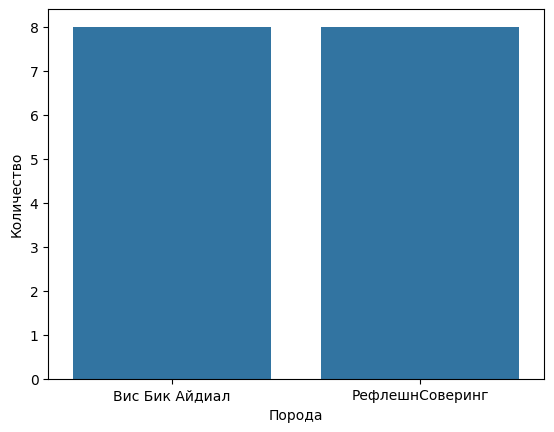

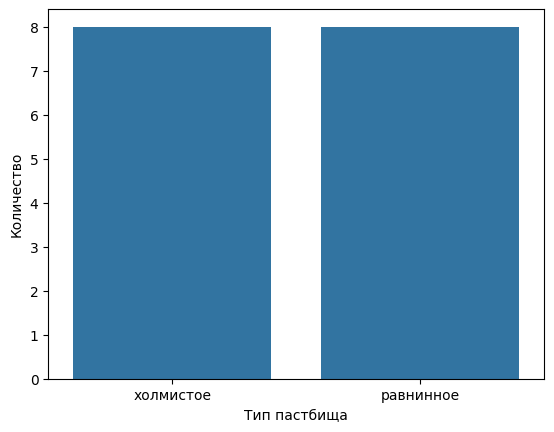

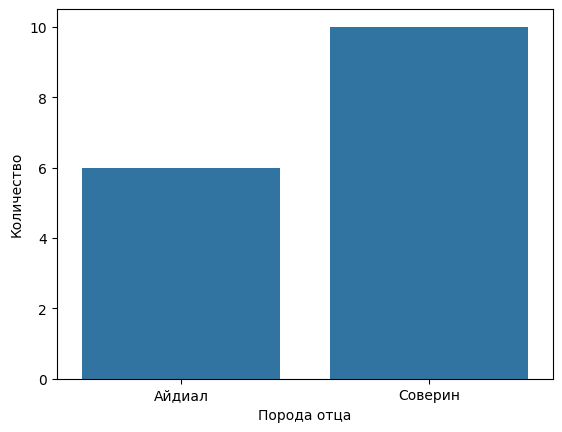

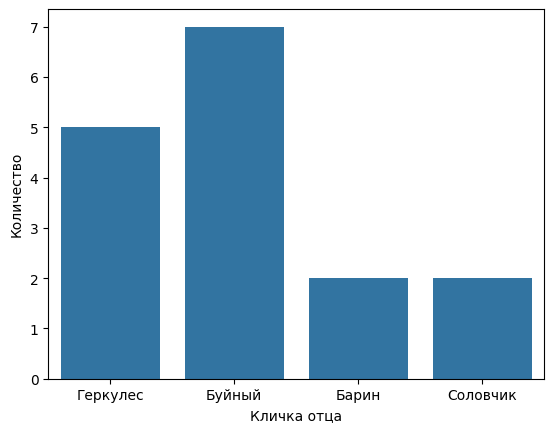

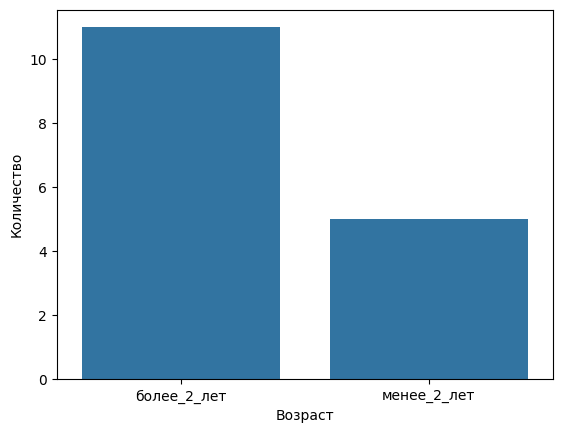

Гистограмма распределения значений для таблицы df_main


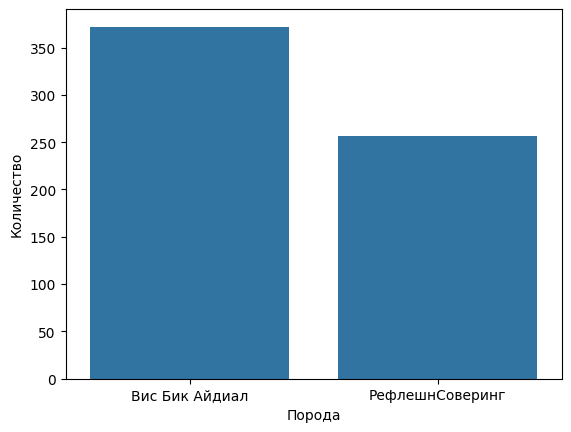

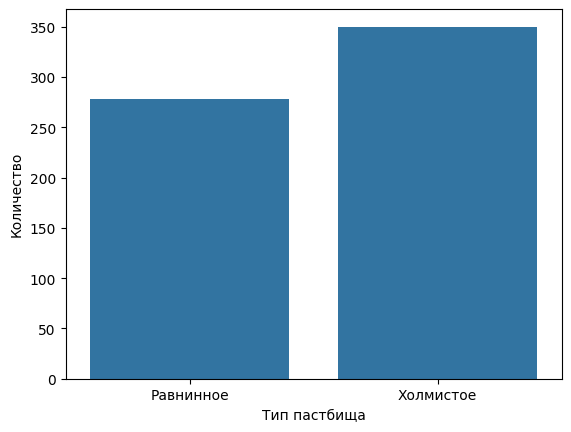

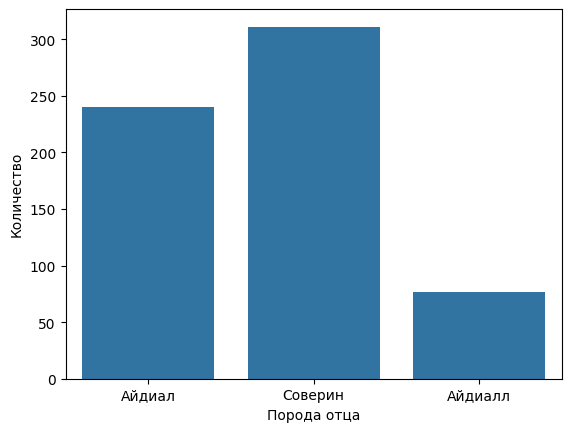

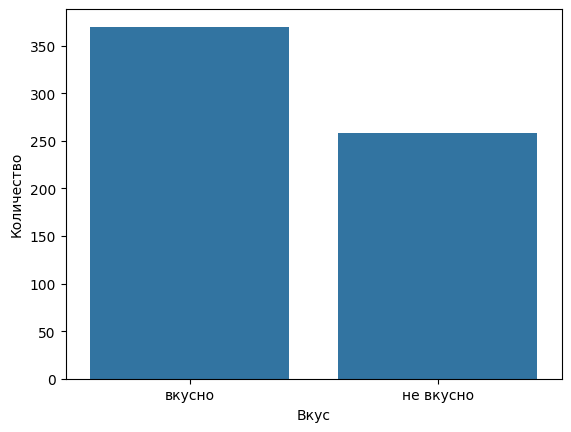

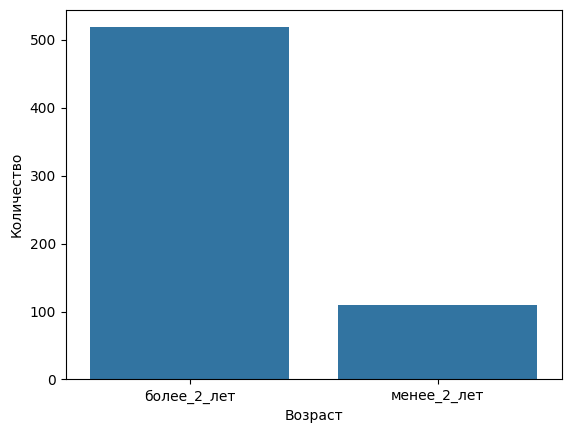

Гистограмма распределения значений для таблицы df_dad


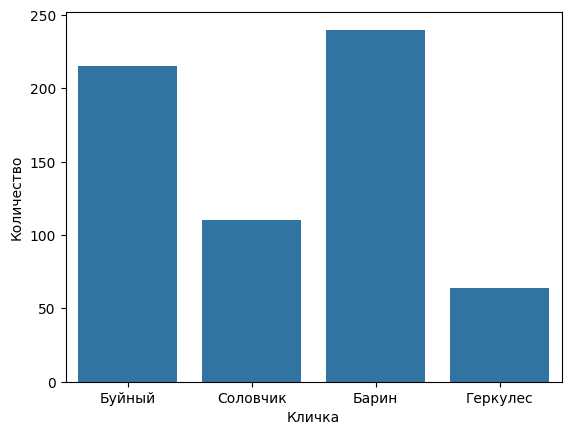

In [118]:
# для каждой таблицы создам константу содержащую перчень столбцов с категориальными признаками

for d in DF_NAMES:
    if 'cow' in d: c_a = COW_CAT_COL
    if 'main' in d: c_a = MAIN_CAT_COL
    if 'dad' in d: c_a = DAD_CAT_COL
    print(f'Гистограмма распределения значений для таблицы {d}')
    for c in c_a:
        ax = sns.countplot(x=c, data = globals()[d])
        ax.set(xlabel=c_a[c], ylabel='Количество')
        plt.show()


##### Количественные признаки

"Ящик с усами" для таблицы df_cow


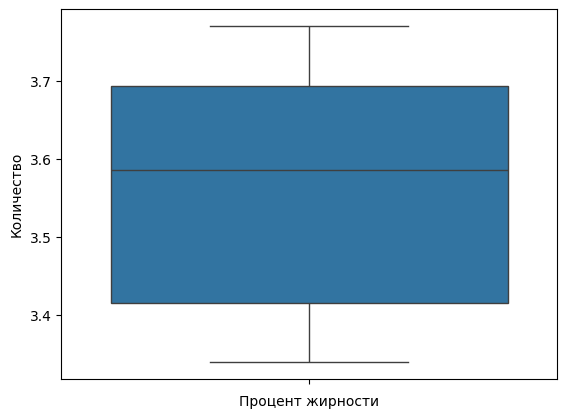

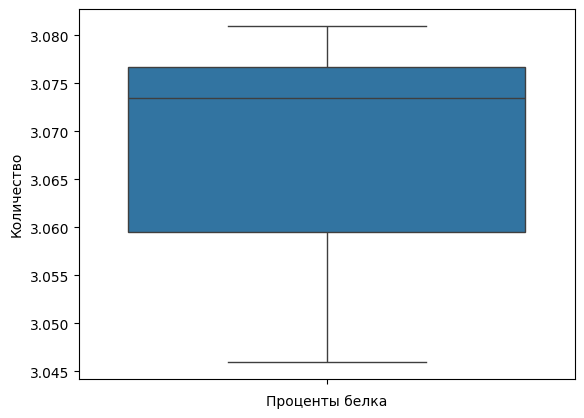

"Ящик с усами" для таблицы df_main


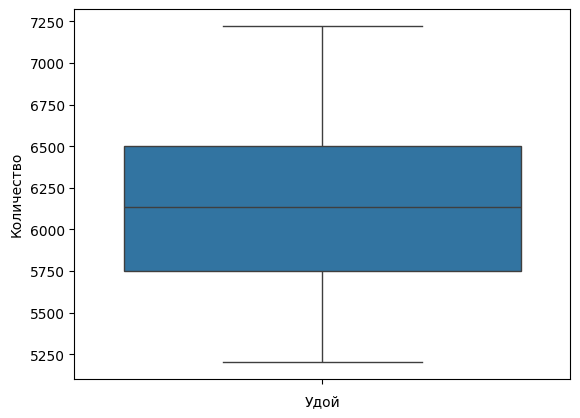

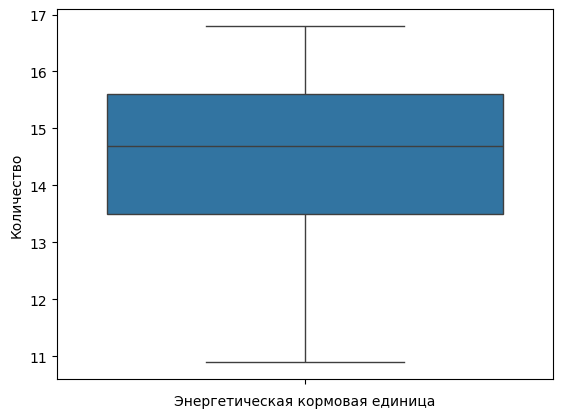

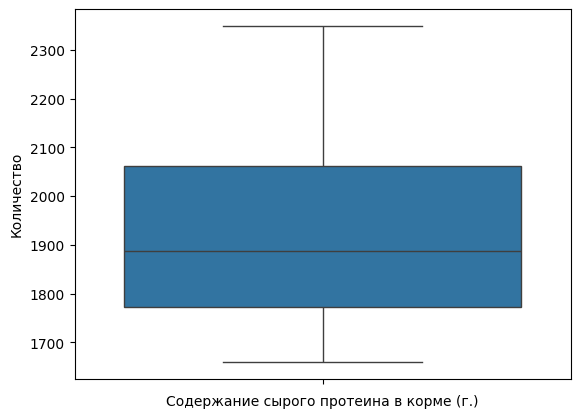

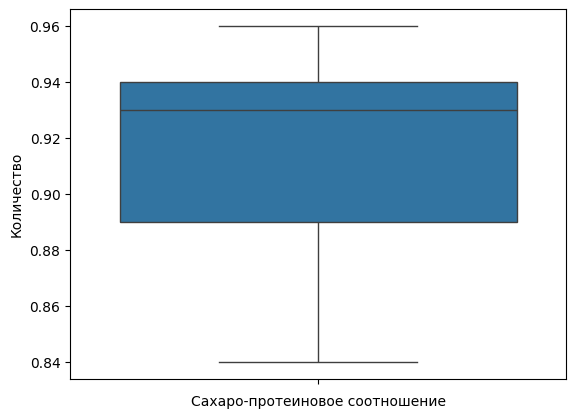

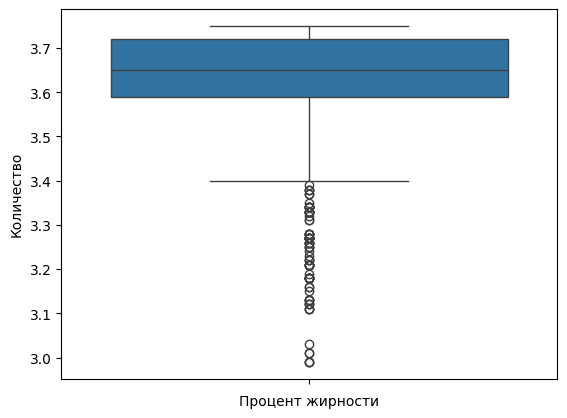

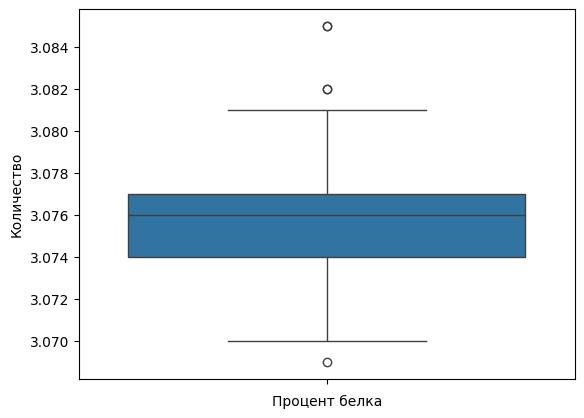

In [99]:
# для отображения количественных признаков буду использовать boxplot
for d in DF_NAMES[:2]:
    if 'cow' in d: c_a = COW_NUM_COL
    if 'main' in d: c_a = MAIN_NUM_COL
    print(f'"Ящик с усами" для таблицы {d}')
    for c in c_a:
        ax = sns.boxplot(y=c, data=globals()[d])
        ax.set(xlabel=c_a[c], ylabel='Количество')
        plt.show()        

## Вывод  

В ходе статистического анализа было выявлено одно аномальное значение и оно удалено.  
Самым неприятным, в смысле дальнейшего анализа, будет являться процент жирности из данных заказчика, в них больше всего аномальных значений меньше первого квартиля. Можно сказать, что % жирности находится в рамках 3.6-3.7, но присутствует много аномальных значений меньше. Процент белка имеет немного аномальных значений и они вряд ли сильно скажится на дальнейшей работе.


# 3. Подготовка данных к машинному обучению

## Преамбула

## Вывод

# 4. Обучение и настройка модели

## Преамбула

## Вывод

# 5. Тестирование модели

## Преамбула

## Вывод

# 6. Вывод